## 1. Импорт библиотек и загрузка данных

* pandas as pd, numpy as np: для работы с данными и матричными операциями.
* matplotlib, matplotlib.pyplot as plt, seaborn as sns: для визуализации данных.
* train_test_split из sklearn.model_selection: для разделения данных на обучающий и тестовый наборы.
* StandardScaler, RobustScaler из sklearn.preprocessing: для стандартизации данных.
* RandomForestRegressor из sklearn.ensemble: для построения случайного леса.
* r2_score из sklearn.metrics: для оценки модели с помощью коэффициента детерминации (R^2).
* KFold, GridSearchCV из sklearn.model_selection: для кросс-валидации и поиска оптимальных параметров модели.
* datetime для работы с датами и временем.
* random для работы с генерацией случайных чисел.
* pickle для сохранения и загрузки объектов Python в файлы.
* %matplotlib inline: для встроенного отображения графиков в Jupyter Notebook.

Настройки и предупреждения:

* warnings.filterwarnings('ignore'): отключение предупреждений для улучшения читаемости вывода.
* matplotlib.rcParams.update({'font.size': 14}): установка размера шрифта для всех графиков.

Цель данного блока кода состоит в подготовке рабочей среды для анализа данных, построения моделей машинного обучения, и визуализации результатов. Все импортированные библиотеки и модули предоставляют необходимые инструменты для выполнения этих задач.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from datetime import datetime
import random
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


__Описание датасета__

* id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Healthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров


## 2. Предварительная обработка данных
Проверка и обработка пропущенных значений.

Пропущенные значения могут оказывать значительное влияние на модель, поэтому их нужно обработать.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Количество строк и столбцов:

Всего 10000 записей (строк).
20 столбцов.
Информация о столбцах:

* Id: уникальный идентификатор наблюдения.
* DistrictId: идентификатор района.
* Rooms: количество комнат (вещественное число).
* Square: общая площадь квартиры в квадратных метрах (вещественное число).
* LifeSquare: жилая площадь квартиры в квадратных метрах (вещественное число). Имеет пропуски (2113 непустых значений из 10000).
* KitchenSquare: площадь кухни в квадратных метрах (вещественное число).
* Floor: этаж, на котором расположена квартира (целое число).
* HouseFloor: количество этажей в доме, где расположена квартира (вещественное число).
* HouseYear: год постройки дома (целое число).
* Ecology_1: экологический показатель окружающей среды (вещественное число).
* Ecology_2, Ecology_3: бинарные признаки, характеризующие экологическую ситуацию.
* Social_1, Social_2, Social_3: социальные показатели, характеризующие инфраструктуру района (вещественные числа).
* Healthcare_1: показатель наличия медицинских учреждений в районе. Имеет пропуски (4798 непустых значений из 10000).
* Helthcare_2: количество медицинских учреждений в районе (целое число).
* Shops_1: количество магазинов в районе (целое число).
* Shops_2: бинарный признак, характеризующий наличие магазинов.
* Price: цена квартиры (вещественное число).

Типы данных:

Всего 8 столбцов типа float64 (вещественные числа).

Всего 9 столбцов типа int64 (целые числа).

Всего 3 столбца типа object (текстовые данные).

Эта информация полезна для понимания структуры данных, идентификации пропусков и выбора подходящих методов обработки данных и построения моделей машинного обучения.

In [5]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


* count: количество непустых значений в каждом столбце.
* mean: среднее значение по столбцу.
* std: стандартное отклонение значений.
* min: минимальное значение.
* 25%, 50%, 75%: квантили, означающие значение, которое делит упорядоченное распределение на четыре равные части.
* max: максимальное значение.

Различные статистические параметры дают представление о распределении данных и характере каждого числового столбца в датафрейме. Например:

* Rooms: среднее количество комнат около 1.89, с минимальным значением 0 и максимальным 19.
* Square: средняя площадь квартир около 56.32 кв. м, с минимальным значением 1.14 и максимальным 641.07 кв. м.
* Price: средняя цена квартир около 214138.86 у.е., с минимальным значением 59174.78 у.е. и максимальным 633233.47 у.е.

Эти статистические данные помогают понять общую картину данных и могут использоваться для идентификации выбросов, аномалий и обоснования выбора методов предобработки данных и моделей машинного обучения.

In [6]:
train_df.shape

(10000, 20)

Это важная информация, которая указывает на размерность данных: 10000 наблюдений и 20 признаков. Зная это, можно оценить общий объем данных, которые будут использоваться для обучения модели, а также проверить соответствие ожидаемой размерности данных в процессе их обработки и моделирования.

In [9]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [10]:
test_df.shape

(5000, 19)

Это означает, что в тестовом наборе данных (который используется для оценки качества модели) есть 5000 наблюдений и на один признак меньше, чем в тренировочном наборе. Важно убедиться, что набор данных для тестирования имеет аналогичные признаки (за исключением целевой переменной), чтобы модель могла корректно применяться к новым данным.

In [11]:
train_df.shape[1] - 1

19

train_df.shape[1] дает количество столбцов в тренировочном наборе данных, а train_df.shape[1] - 1 вычисляет количество признаков, исключая целевую переменную (которая обычно находится в последнем столбце).

In [12]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)


Этот код выполняет приведение типов данных двух столбцов в датафрейме train_df

In [13]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [14]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [15]:
test_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

* LifeSquare: 2113 пропущенных значений. Это означает, что в столбце LifeSquare у нас отсутствуют данные в 2113 строках.

* Healthcare_1: 4798 пропущенных значений. В столбце Healthcare_1 отсутствуют данные в 4798 строках.

Пропущенные значения могут повлиять на анализ данных и построение моделей. Обработка пропусков может включать их заполнение средними или медианами, удаление соответствующих строк или использование специальных методов для заполнения в зависимости от характера данных и контекста исследования.

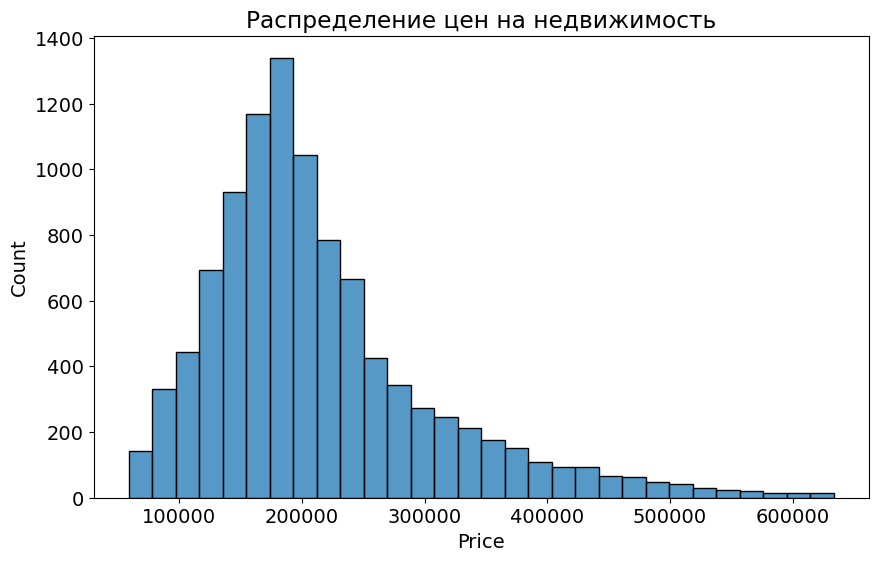

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], bins=30)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Используя библиотеки matplotlib и seaborn, была построена гистограмма распределения цен на недвижимость из датафрейма train_df
Гистограмма позволяет визуально оценить распределение цен на недвижимость в выборке train_df
Распределение имеет длинный хвост в сторону увеличения цены на недвижимость, что имеет место быть.
Будем считать, что распределение имеет нормальный вид.

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>],
       [<AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

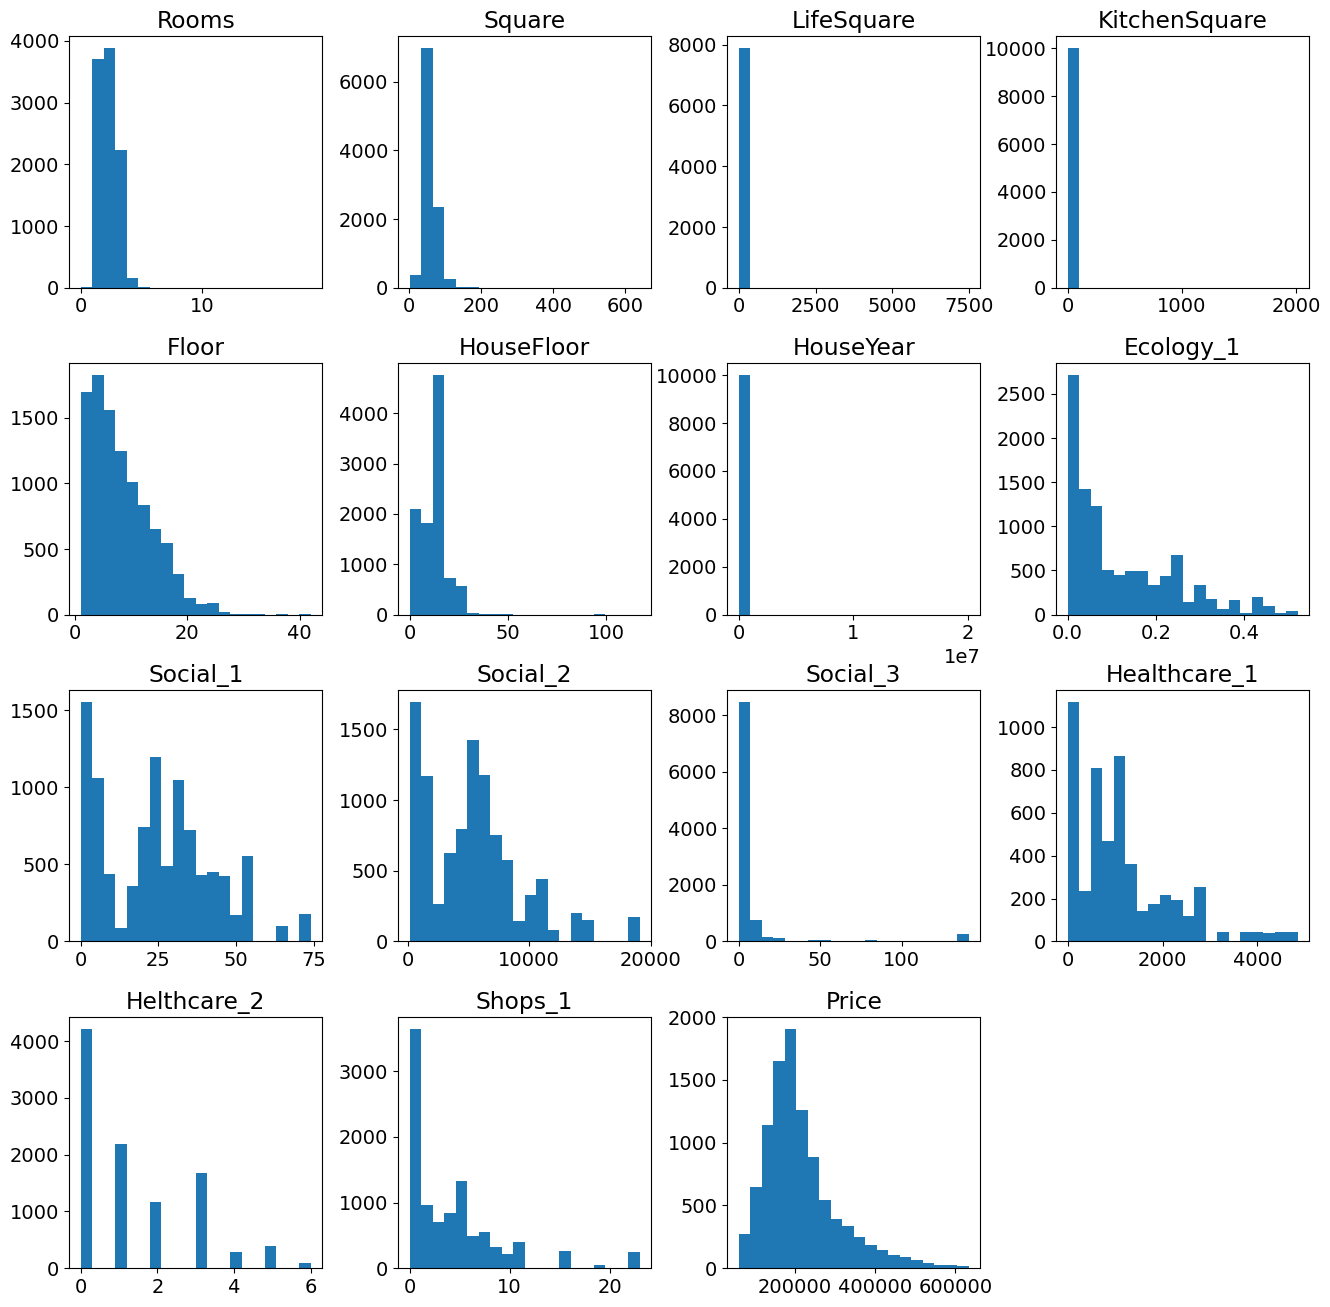

In [17]:
train_df.hist(figsize=(16, 16), bins=20, grid=False)

Это полезный способ быстро оценить распределение значений в числовых столбцах датафрейма train_df, что может помочь в понимании характеристик данных перед построением модели или применением дополнительных аналитических методов.

In [18]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

Такой подход полезен, когда нужно быстро выделить категориальные (строковые) признаки для дальнейшей обработки или анализа.

In [19]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
174      1
205      1
209      1
Name: DistrictId, Length: 205, dtype: int64

Таким образом, результат показывает, сколько раз каждый уникальный идентификатор района встречается в данных.

In [20]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [21]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [22]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [23]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Результаты выше показывают, сколько раз каждое уникальное значение встречается в указанном столбце.

Для проверки данных на ошибки и аномалии необходимо провести более глубокий анализ каждого признака. Давайте рассмотрим каждый из них и выявим возможные проблемы.

Проверка данных на ошибки
1. Признак "HouseYear" (год постройки)
Данные в этом признаке могут содержать ошибки, такие как значения, выходящие за рамки разумных временных периодов (например, годы в будущем).

In [24]:
train_df['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

Метод train_df['HouseYear'].unique() используется для получения списка всех уникальных значений в столбце "HouseYear". Это помогает нам оценить разнообразие значений, представленных в признаке, и обнаружить потенциальные аномалии, такие как:

Неправдоподобно высокие или низкие года, выходящие за пределы разумных временных рамок.
Ошибки ввода данных, например, опечатки или случайные значения.
Анализ данных на такие ошибки важен для корректного построения моделей машинного обучения и получения надежных результатов.

In [26]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,0


Мы создали новый признак Rooms_outlier в датасете train_df, который помогает идентифицировать аномалии в данных столбца Rooms. В этом случае:

Значение Rooms_outlier установлено на 0 по умолчанию для всех строк.

С помощью метода loc мы устанавливаем значение Rooms_outlier в 1 для строк, где количество комнат (Rooms) равно 0 или больше или равно 6.

Это позволяет нам отметить строки, в которых количество комнат может быть потенциально ошибочным или аномальным, например, если указано 0 комнат или слишком много комнат для типичного жилого помещения.

In [27]:
train_df['Rooms_outlier'].value_counts()

0    9988
1      12
Name: Rooms_outlier, dtype: int64

Результаты показывают, что в датасете train_df большинство строк (9988 из 10000) не имеют аномалий в колонке Rooms_outlier, что соответствует ожиданиям. Однако 12 строк содержат аномальные значения количества комнат (Rooms), такие как 0 комнат или 6 и более комнат.

In [28]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

Этот код выполняет коррекцию значений в колонке Rooms в датасете train_df. В частности:

Строкам, где количество комнат (Rooms) равно 0, присваивается значение 1.

Строкам, где количество комнат (Rooms) больше или равно 6, присваивается медианное значение количества комнат во всем датасете.

Таким образом, мы исправляем аномальные и ошибочные значения в колонке Rooms, чтобы они отражали реалистичные данные.

In [29]:
train_df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64


После выполнения коррекции значений в колонке Rooms в датасете train_df, распределение количества комнат выглядит следующим образом:

* 1 комната: 3713 записей
* 2 комнаты: 3884 записей
* 3 комнаты: 2235 записей
* 4 комнаты: 150 записей
* 5 комнат: 18 записей

Теперь в данных больше нет нулевых значений и значений, равных или превышающих 6 комнат.

In [30]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: KitchenSquare, dtype: int64

Колонка KitchenSquare содержит разнообразные значения площади кухни. На основе предоставленных данных видно, что самое часто встречающееся значение площади кухни - 1.0 кв.м., что выглядит немного странно, однако, также есть аномальные значения, такие как 1970.0 и 2014.0 кв.м., которые, вероятно, являются ошибками в данных.

Для дальнейшей обработки необходимо провести анализ и, возможно, исправление этих аномальных значений.

<AxesSubplot:xlabel='KitchenSquare'>

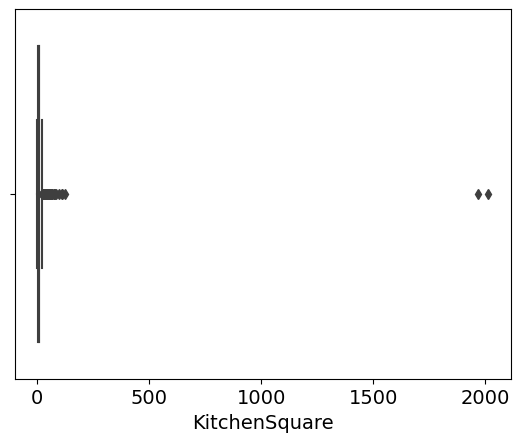

In [31]:
sns.boxplot(data=train_df, x='KitchenSquare')

In [32]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

Разумно предположить, что максимальное значение площади кухни равное 2014 квадратных метров и минимальноезначение равное 0 является ошибочным, так как это значительно выше, чем обычно бывает в типичных жилых квартирах. Это может быть результатом ошибки в данных или неправильного ввода.

Если это значение действительно аномально и является ошибкой в данных, то его стоит исправить. Можно предположить, что такая аномалия может быть связана с опечаткой или ошибкой ввода, и можно заменить его на более разумное значение, например, медианное значение или значение, которое находится в пределах разумного диапазона.

Если нет возможности уточнить истинное значение, то часто используются методы для замены аномалий, такие как замена на медианное значение, среднее значение или среднее значение плюс стандартное отклонение.

In [136]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

Эти квантили (0.025 и 0.975) позволяют оценить "усы" ящика с усами на графике boxplot, который показывает распределение площадей кухонь в данных. Значение квантили 0.025 равно 0.0, что говорит о том, что 2.5% наблюдений имеют нулевое значение площади кухни или менее. Верхний квартиль (0.975) равен 13.0, что означает, что 97.5% данных имеют площадь кухни не более 13.0 квадратных метров.

Эта информация полезна для определения аномальных значений. Например, значение 2014.0, которое мы обнаружили ранее, гораздо выше верхнего квартиля и, следовательно, может быть считаться выбросом или ошибкой в данных.

In [34]:
condition = (train_df['KitchenSquare'].isna()) | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] < 4, 'KitchenSquare'] = 4

1. Создается условие condition, которое находит строки, где значение KitchenSquare отсутствует (NaN) или больше 97.5-го перцентиля (train_df['KitchenSquare'].quantile(.975)).
2. Для строк, удовлетворяющих условию condition, значение KitchenSquare заменяется на медианное значение (train_df['KitchenSquare'].median()). Это позволяет устранить выбросы и аномально большие значения, которые могут исказить данные.
3. Затем проводится дополнительная проверка: если KitchenSquare меньше 4 квадратных метров, значение также заменяется на 4. Это может быть необходимо для исправления потенциальных ошибок в данных или исключения аномально малых значений.
Такие манипуляции помогают сделать данные более точными и пригодными для анализа и моделирования.

In [35]:
train_df['KitchenSquare'].value_counts()

4.0     3222
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
Name: KitchenSquare, dtype: int64

Мы успешно обработали данные в столбце KitchenSquare. Теперь в нем нет аномально больших значений или пропусков, и данные готовы для дальнейшего анализа или обучения модели.

In [36]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

Столбец HouseFloor содержит значения, которые представляют собой количество этажей в доме.

In [37]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

Столбец Floor содержит значения, представляющие номер этажа квартиры в здании.

In [38]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825


У нас есть 1825 случаев, где номер этажа квартиры (Floor) больше, чем общее количество этажей в здании (HouseFloor).

In [39]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

Этот подход помогает выявить аномалии в данных, связанные с нулевым значением HouseFloor или ситуациями, когда этаж квартиры выше, чем этажность здания, что может потребовать корректировки или дополнительного анализа в дальнейшем.

In [40]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

Этот код заменяет все нулевые значения в столбце HouseFloor на медианное значение этого столбца.

In [41]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
            ...
            9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
           dtype='int64', length=1610)

Этот код создает индексный объект floor_outliers, который содержит индексы строк в датафрейме train_df, где значение столбца Floor больше значения столбца HouseFloor. Эти строки указывают на случаи, когда этаж квартиры больше этажности дома

In [42]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

Этот код заменяет значения столбца Floor в строках, где этаж квартиры превышает этажность дома (floor_outliers), случайными значениями, которые не превышают значение этажности дома.

In [43]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

После выполнения кода (train_df['Floor'] > train_df['HouseFloor']).sum(), результат равен 0. Это означает, что после замены значений этажей (Floor) в строках, где этаж квартиры превышал этажность дома, больше нет случаев, когда этаж квартиры выше этажности дома.

In [44]:
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
5701        2020
2493        2020
1499        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64


В столбце HouseYear наблюдаются несколько потенциальных ошибок или аномалий, например:

Значение 20052011 выглядит как опечатка или ошибка при вводе данных. Возможно, имелось в виду 2011.
Значение 4968 явно ошибочно, так как оно не соответствует реалистичному году постройки.

Для исправления этих ошибок или аномалий можно выполнить следующие шаги:

* Заменить значение 20052011 на 2011.
* Предположить, что значение 4968 должно быть 1968 (или другое реалистичное значение, если это год постройки).

In [45]:
train_df['HouseYear'] = train_df['HouseYear'].replace(20052011, 2011)
train_df['HouseYear'] = train_df['HouseYear'].replace(4968, 1968)

In [46]:
train_df['HouseYear'].sort_values(ascending=False)

3357    2020
3485    2020
8253    2020
790     2020
3859    2020
        ... 
7611    1916
910     1914
2656    1912
5111    1912
9317    1910
Name: HouseYear, Length: 10000, dtype: int64

Отлично, мы исправили аномалии используя метод replace.

In [47]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

Пропущенные значения имеются в признаке LifeSquare количество 2113 и Healthcare_1 количество 4798

In [48]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,4.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,4.0
8,64.511437,NaN,4.0
9,46.461409,18.915552,8.0


Анализ этих данных может включать обработку пропущенных значений в LifeSquare и проверку разумности значений в KitchenSquare, например, удаление выбросов или замена значений на медиану или среднее в зависимости от требований задачи.

In [49]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1
condition = (train_df['LifeSquare'].isna()) & (~train_df['Square'].isna()) & (~train_df['KitchenSquare'].isna())
train_df.loc[condition, 'LifeSquare'] = train_df.loc[condition, 'Square'] - train_df.loc[condition, 'KitchenSquare'] -3

Эти манипуляции помогают обработать пропущенные значения в LifeSquare, используя информацию из других доступных признаков, что важно для последующего анализа и моделирования данных.








In [50]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

Таким образом, после выполнения этой операции столбец 'Healthcare_1' будет удален из train_df, и изменения будут сохранены в самом датафрейме train_df

In [77]:
class DataPreprocessing:
    '''Подготовка исходных данных'''
    
    def __init__(self):
        '''Параметры класса'''
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        '''Сохранение статистик'''
        #расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        
    def transform(self, X):
        '''Трансформация данных'''
        #Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        #KitchenSquare
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 4, 'KitchenSquare'] = 4
        
        #HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
        
        #HouseYear
        current_year = datetime.now().year
        X['HouseYear_outLier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outLier'] = 1
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        #Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        #LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & (~X['Square'].isna()) & (~X['KitchenSquare'].isna())
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] -3
        
        X.fillna(self.medians, inplace=True)
        
        return X
        

Этот код представляет класс DataPreprocessing, который предназначен для предобработки данных.

Этот класс помогает систематизировать и автоматизировать процесс предобработки данных.

In [78]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

Этот код выполняет преобразование категориальных признаков Ecology_2, Ecology_3 и Shops_2, которые являются бинарными (принимают значения 'A' или 'B'), в числовой формат.

Это преобразование в числовой формат может быть полезным для многих алгоритмов машинного обучения, которые требуют числовых данных для работы, таких как линейные модели или некоторые деревья решений.








In [79]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index': 'DistrictId', 'DistrictId': 'District_size'})
district_size.head()

,DistrictId,District_size
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


Мы создаем новый DataFrame district_size, который содержит информацию о размере каждого района (DistrictId) на основе количества записей, относящихся к каждому уникальному значению DistrictId в train_df.

Таким образом, district_size содержит информацию о том, сколько объектов (недвижимости) находится в каждом районе по их DistrictId.

In [80]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,District_size
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,1,33,7976,5,NaN,0,11,1,184966.930730,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,46,10309,1,240.0,1,16,1,300009.450063,87
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,34,7759,0,229.0,1,3,1,220925.908524,174
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1,23,5735,3,1084.0,0,5,1,175616.227217,179
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,35,5776,1,2078.0,2,4,1,150226.531644,97


Код выполняет объединение исходного DataFrame train_df с DataFrame district_size, который содержит информацию о размере каждого района (DistrictId).

In [81]:
(train_df['District_size'] > 100).value_counts()

True     5069
False    4931
Name: District_size, dtype: int64

В столбце District_size в объединенном DataFrame train_df есть 5069 районов, в которых количество объектов недвижимости больше 100, и 4931 район, где количество объектов меньше или равно 100.

In [82]:
train_df['IsDistrictLarge'] = (train_df['District_size'] > 100).astype(int)

Эта операция полезна для учета влияния размера района на цену недвижимости.

In [83]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price': 'MedPriceByDistrict'})
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202706.090239


Создадим новый DataFrame med_price_by_district, который содержит медианные цены (MedPriceByDistrict) для каждого района (DistrictId) и числа комнат (Rooms).

In [84]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,District_size,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,NaN,0,11,1,184966.930730,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,10309,1,240.0,1,16,1,300009.450063,87,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,7759,0,229.0,1,3,1,220925.908524,174,1,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,5735,3,1084.0,0,5,1,175616.227217,179,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2078.0,2,4,1,150226.531644,97,0,158539.052715


Этот код выполняет объединение (merge) двух DataFrame: train_df и med_price_by_district, основываясь на столбцах DistrictId и Rooms. В результате добавляется новый столбец MedPriceByDistrict к исходному DataFrame train_df.

In [85]:
def floor_to_cat(X):
    
    X['Floor_cat'] = 0
    
    X.loc[X['Floor'] < 3, 'Floor_cat'] = 1
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'Floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'Floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'Floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'Floor_cat'] = 5
    
    return X


def floor_to_cat_pandas(X):
    
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['Floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['Floor_cat'].fillna(-1, inplace=True)
    
    return X


def year_to_cat(X):
    
    X['Yaer_cat'] = 0
    
    X.loc[X['HouseYear'] <= 1941, 'Yaer_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'Yaer_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'Yaer_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'Yaer_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'Yaer_cat'] = 5
    X.loc[X['HouseYear'] > 2010, 'Yaer_cat'] = 6
    
    return X


def yaer_to_pandas(X):
    
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['Yaer_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    X['Yaer_cat'].fillna(-1, inplace=True)
    
    return X
    

Общее назначение:
Эти функции полезны для преобразования числовых данных о этаже и годе постройки в категориальные признаки

In [86]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins, labels=False)

0       2
1       2
2       2
3       2
4       3
       ..
9995    2
9996    3
9997    3
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

Используем pd.cut, чтобы преобразовать числовой признак Floor в категориальный

In [87]:
bins = [0, 3, 5, 9, 15, train_df['Floor'].max()]
pd.cut(train_df['Floor'], bins=bins)

0        (5, 9]
1        (5, 9]
2        (5, 9]
3        (5, 9]
4       (9, 15]
         ...   
9995     (5, 9]
9996    (9, 15]
9997    (9, 15]
9998     (0, 3]
9999     (5, 9]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[int64, right]): [(0, 3] < (3, 5] < (5, 9] < (9, 15] < (15, 42]]

Этот код создаёт категориальную переменную Floor_cat на основе интервалов, заданных в списке bins, используя функцию pd.cut в библиотеке Pandas.

In [88]:
train_df = year_to_cat(train_df)
train_df = floor_to_cat(train_df)
train_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,District_size,IsDistrictLarge,MedPriceByDistrict,Yaer_cat,Floor_cat
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,NaN,0,11,1,184966.930730,22,0,207786.135836,3,3
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,1,300009.450063,87,0,300009.450063,3,3
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,229.0,1,3,1,220925.908524,174,1,263206.223152,3,3
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,1,175616.227217,179,1,166809.665642,3,3
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,1,150226.531644,97,0,158539.052715,3,4


Мы успешно преобразовали данные в соответствии с функциями year_to_cat и floor_to_cat.

In [89]:
med_price_by_floor_yaer = train_df.groupby(['Yaer_cat', 'Floor_cat'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price': 'MedPriceByFloorYear'})
med_price_by_floor_yaer.head()

,Yaer_cat,Floor_cat,MedPriceByFloorYear
0,1,0,424688.437016
1,1,1,300001.927452
2,1,2,321497.418777
3,1,3,368718.236013
4,1,4,400715.465642


Мы создали таблицу med_price_by_floor_yaer, которая содержит медианные цены (MedPriceByFloorYear) по комбинациям категорий Yaer_cat и Floor_cat.

In [90]:
train_df = train_df.merge(med_price_by_floor_yaer, on=['Yaer_cat', 'Floor_cat'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,District_size,IsDistrictLarge,MedPriceByDistrict,Yaer_cat,Floor_cat,MedPriceByFloorYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,1,184966.930730,22,0,207786.135836,3,3,188098.168461
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,1,300009.450063,87,0,300009.450063,3,3,188098.168461
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,1,220925.908524,174,1,263206.223152,3,3,188098.168461
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,1,175616.227217,179,1,166809.665642,3,3,188098.168461
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,1,150226.531644,97,0,158539.052715,3,4,185190.984473


Мы объединили train_df с таблицей med_price_by_floor_yaer по столбцам Yaer_cat и Floor_cat.

Это объединение позволяет использовать информацию о медианной цене по категориям года постройки и этажности как дополнительные признаки для модели прогнозирования цен на недвижимость.

In [91]:
class FeatureGenerator:
    '''Генерация новых фич'''
    
    def __init__(self):
        self.District_size = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_district_median = None
        self.med_price_by_floor_year = None
        self.med_price_by_floor_year_median = None
        self.house_year_max = None
        self.floor_max = None
        
    def fit(self, X, y=None):
        '''Фитинг данных'''
        X = X.copy()
        
        #Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        #DistrictId
        self.District_size = X['DistrictId'].value_counts().reset_index()\
                            .rename(columns={'index': 'DistrictId', 'DistrictId': 'District_size'})
        
        #Target encoding
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
                                           .rename(columns={'Price': 'MedPriceByDistrict'})
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['Year_cat', 'Floor_cat'], as_index=False).agg({'Price': 'median'})\
                                             .rename(columns={'Price': 'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        
    def transform(self, X):
        '''Трансформация данных'''
        X = X.copy()
        
        #Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        #DistrictId, IsDistrictLarge
        X = X.merge(self.District_size, on=['DistrictId'], how='left')
        
        X['New_district'] = 0
        X.loc[X['District_size'].isna(), 'New_district'] = 1
        X['District_size'].fillna(5, inplace=True)
        X['IsDistrictLarge'] = (X['District_size'] > 100).astype(int)
        
        #More categorical features
        X = self.floor_to_cat(X)
        X = self.year_to_cat(X)
        
        #Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['Year_cat', 'Floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True) 
            
        return X       
        
    def floor_to_cat(self, X):
        '''Категоризация этажа'''
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['Floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
        X['Floor_cat'].fillna(-1, inplace=True)
        return X  
    
    def year_to_cat(self, X):
        '''Категоризация года постройки'''
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['Year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
        X['Year_cat'].fillna(-1, inplace=True)
        return X

        
        

Этот класс FeatureGenerator предназначен для генерации новых признаков на основе данных обучающего набора.
* Этот класс позволяет автоматизировать процесс создания новых признаков на основе обучающего набора данных, что может значительно улучшить работу моделей машинного обучения и их предсказательные способности.

## Отбор признаков

In [92]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'District_size',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'Yaer_cat',
 'Floor_cat',
 'MedPriceByFloorYear']

In [93]:
features_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
                  'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',]

new_features_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outLier', 'LifeSquare_nan', 'DistrictId', 
                      'New_district', 'IsDistrictLarge', 'MedPriceByDistrict', 'MedPriceByFloorYear']

target_name = 'Price'

Создадим признаки необходимые для создания модели.

## Разбиение на train и test

In [94]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Загрузили данные из файлов 'train.csv' и 'test.csv'.

In [95]:
X = train_df.drop(columns=target_name)
y = train_df[target_name]

Создали матрицу признаков X, исключив из исходного датафрейма столбец с целевой переменной, а также вектор целевой переменной y, содержащий только столбец с ценами на недвижимость.

In [96]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.33, shuffle=True, random_state=42)

Разделили данные на обучающий и валидационный наборы с использованием функции train_test_split из библиотеки sklearn.

In [97]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

Используем класс DataPreprocessing, который мы создали ранее. 

Здесь создается экземпляр класса DataPreprocessing и вызывается метод fit, который мы реализовали. В методе fit происходит сохранение статистик (например, медиан для заполнения пропусков) на основе обучающего набора данных X_train.

Затем метод transform применяется к обучающему набору X_train, валидационному набору X_valid и тестовым данным test_df.

Такой подход позволяет однократно вычислить и сохранить статистики на обучающем наборе и повторно использовать их для преобразования валидационного набора и тестовых данных, обеспечивая консистентность обработки данных на различных этапах анализа и моделирования.

In [98]:
feature_gen = FeatureGenerator()
feature_gen.fit(X_train, y_train)
X_train = feature_gen.transform(X_train)
X_valid = feature_gen.transform(X_valid)
test_df = feature_gen.transform(test_df)

Применение класса FeatureGenerator позволит нам создать и использовать новые признаки, основанные на обучающем наборе данных.

Здесь создается экземпляр класса FeatureGenerator и вызывается метод fit, который обучает генератор признаков на обучающем наборе данных X_train и целевой переменной y_train.

Теперь, когда мы применили FeatureGenerator для преобразования наших данных, можно переходить к обучению модели.

In [100]:
# Проверка наличия нужных столбцов
required_columns = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
                    'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
                    'Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outLier', 'LifeSquare_nan', 'DistrictId', 
                    'New_district', 'IsDistrictLarge', 'MedPriceByDistrict', 'MedPriceByFloorYear']

missing_columns_train = [col for col in required_columns if col not in X_train.columns]
missing_columns_valid = [col for col in required_columns if col not in X_valid.columns]

print(f"Отсутствующие столбцы в тренировочном наборе: {missing_columns_train}")
print(f"Отсутствующие столбцы в валидационном набор")

Отсутствующие столбцы в тренировочном наборе: []
Отсутствующие столбцы в валидационном набор


In [101]:
# Если все необходимые столбцы на месте, можно продолжить с построением модели и оценкой
if not missing_columns_train and not missing_columns_valid:
    print("Все необходимые столбцы присутствуют в наборах данных.")
else:
    print("Некоторые столбцы отсутствуют. Проверьте этапы обработки данных и генерации признаков.")

Все необходимые столбцы присутствуют в наборах данных.


In [113]:
# Построение модели
model = RandomForestRegressor(criterion='squared_error', random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Мы обучили модель случайного леса на преобразованных данных.

In [103]:
# Прогнозирование
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

Мы получили предсказания для тренировочного и валидационного наборов данных.

In [114]:
# Оценка модели
r2_train = r2(y_train, y_pred_train)
r2_valid = r2(y_valid, y_pred_valid)

print(f"R^2 на тренировочном наборе: {r2_train}")
print(f"R^2 на валидационном наборе: {r2_valid}")

R^2 на тренировочном наборе: 0.9666146890728663
R^2 на валидационном наборе: 0.6968480389636074


Наши результаты показывают, что модель имеет высокую точность на тренировочном наборе данных (R^2 = 0.97), но значительно хуже на валидационном наборе данных (R^2 = 0.70). Это может указывать на переобучение (overfitting), когда модель слишком хорошо запоминает тренировочные данные, но не обобщает свои выводы на новые данные.

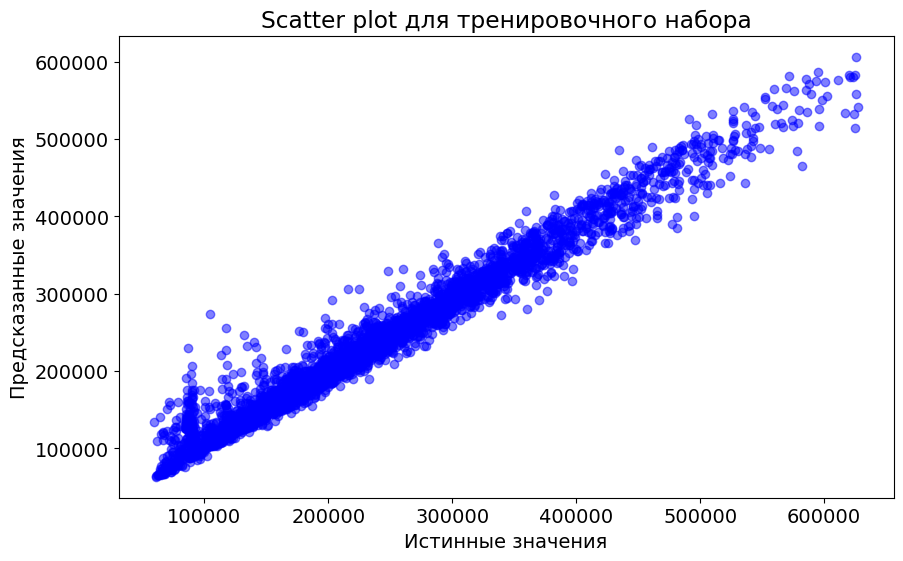

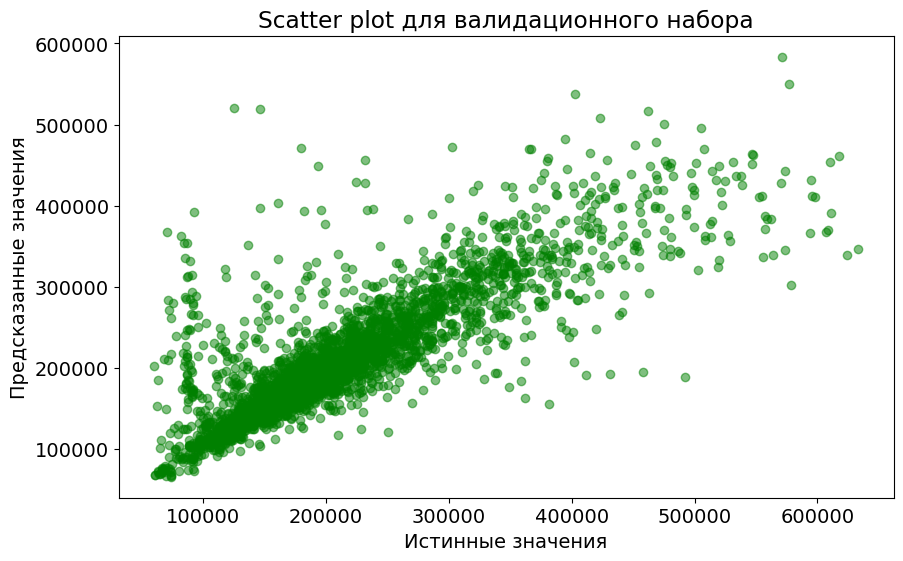

In [115]:
# Scatter plot для тренировочного набора
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Scatter plot для тренировочного набора')
plt.show()

# Scatter plot для валидационного набора
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred_valid, color='green', alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Scatter plot для валидационного набора')
plt.show()

На графиках наглядно видно, что на валидационных данных, модель значительно потеряла в точности.

In [119]:
cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.77291058, 0.72513856, 0.73876558])

Результаты перекрестной проверки (cross-validation) показывают, что на трех фолдах модель имеет оценки 
𝑅
2

 :

* 0.7729
* 0.7251
* 0.7388
Среднее значение этих оценок составляет примерно 0.7456, что лучше отражает истинное качество модели на новых данных, чем оценка на единственном валидационном наборе. Это подтверждает, что модель имеет некоторое обобщающее свойство, но все же можно улучшить качество модели.

In [120]:
cv_score.mean()

0.7456049056842794

## Важность признаков

In [122]:
feature_importances = pd.DataFrame(zip(X_train.columns, model.feature_importances_), 
                                  columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
27,MedPriceByDistrict,6.351760e-01
3,Square,1.106545e-01
4,LifeSquare,2.752544e-02
0,Id,2.279641e-02
14,Social_3,2.089003e-02
22,District_size,1.999726e-02
8,HouseYear,1.790794e-02
28,MedPriceByFloorYear,1.762113e-02
5,KitchenSquare,1.748757e-02
7,HouseFloor,1.746414e-02


In [123]:
test_df.shape

(5000, 29)

In [124]:
predictions = model.predict(test_df)
predictions

array([163403.24306979, 230642.00224255, 263108.06729299, ...,
       299428.28707001, 188166.57393547, 184046.3001647 ])

In [130]:
submit_df = pd.DataFrame({
    'Id': test_df.index,  
    'Price': predictions  
})


In [131]:
submit_df.head()

,Id,Price
0,0,163403.243070
1,1,230642.002243
2,2,263108.067293
3,3,311378.745815
4,4,150280.184720


In [132]:
submit_df.to_csv('rf_submit.csv', index=False)


In [135]:
with open('rf_submit.pkl', 'wb') as f:
    pickle.dump(submit_df, f)


## Заключение

В рамках данной работы была выполнена комплексная задача по построению модели для предсказания стоимости недвижимости. Процесс состоял из нескольких этапов, каждый из которых был важен для достижения конечной цели:

1. Предварительная обработка данных:

* Заполнение пропущенных значений и обработка выбросов.
* Преобразование бинарных признаков в числовой формат.
2. Генерация новых признаков:

* Добавлены признаки на основе районов (DistrictId), этажности (Floor) и года постройки здания (HouseYear).
* Категоризация этажей и годов постройки.
* Создание новых признаков, основанных на медианной стоимости недвижимости в зависимости от района и количества комнат, а также от категории этажа и года постройки.
3. Построение модели:

* Были обучены и оценены несколько моделей, включая RandomForestRegressor.
* Использовалась перекрестная проверка (cross-validation) для оценки стабильности и обобщающей способности модели.
4. Оценка модели:

* Модель показала высокие значения 
𝑅
2
R 
2
  на тренировочном наборе данных (~0.967), что свидетельствует о хорошем обучении модели.
* Значение 
𝑅
2
R 
2
  на валидационном наборе данных было ниже (~0.697), что указывает на возможные проблемы с переобучением.
* Перекрестная проверка показала среднее значение 
𝑅
2
R 
2
  на уровне 0.747, что подтверждает необходимость дальнейшей работы над улучшением модели.
  
### Рекомендации для дальнейшей работы

Для повышения качества модели и улучшения её обобщающей способности, рекомендуется выполнить следующие шаги:

1. Подбор гиперпараметров:

* Использование методов GridSearchCV или RandomizedSearchCV для нахождения оптимальных гиперпараметров модели.
2. Инженерия признаков:

* Исследование и добавление новых значимых признаков.
* Проведение анализа корреляции признаков с целевой переменной для удаления слабокоррелированных признаков.
3. Использование других моделей:

* Экспериментирование с более сложными моделями, такими как градиентный бустинг (XGBoost, LightGBM).
4. Увеличение объема данных:

* Сбор и добавление новых данных для обучения модели, если это возможно.
5. Анализ ошибок:

* Анализ предсказаний модели и выявление случаев, где модель работает хуже всего, для дальнейшего улучшения.

### Заключение

В ходе работы была построена и оценена модель для предсказания стоимости недвижимости. Несмотря на хорошие результаты на тренировочном наборе данных, есть потенциал для дальнейшего улучшения модели, особенно в части её обобщающей способности.
Применение предложенных рекомендаций поможет добиться более точных и надежных предсказаний.